In [1]:
from tensorflow import keras

In [2]:
import tensorflow as tf

In [50]:
import numpy as np

In [3]:
from keras import Sequential

In [4]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [44]:
import keras.utils as image


In [5]:
#generator

In [6]:
train_ds=tf.keras.utils.image_dataset_from_directory(directory='Documents\CNN Images\\training_set',labels="inferred",
    label_mode="int",batch_size=32,image_size=(256, 256))


Found 8000 files belonging to 2 classes.


In [7]:
validation_ds=tf.keras.utils.image_dataset_from_directory(directory='Documents\CNN Images\\test_set',labels="inferred",
    label_mode="int",batch_size=32,image_size=(256, 256))


Found 2000 files belonging to 2 classes.


In [8]:
type(train_ds)


tensorflow.python.data.ops.dataset_ops.BatchDataset

# Normalize

In [9]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

In [10]:
train_ds=train_ds.map(process)

In [11]:
validation_ds=validation_ds.map(process)

# Creating CNN Model

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))

In [14]:
model.add(BatchNormalization())

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

In [16]:
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))

In [17]:
model.add(BatchNormalization())

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

In [19]:
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))

In [20]:
model.add(BatchNormalization())

In [21]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(128,activation='relu'))

In [24]:
model.add(Dropout(0.1))

In [25]:
model.add(Dense(64,activation='relu'))

In [26]:
model.add(Dropout(0.1))

In [27]:
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [29]:
model.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [30]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
250/250 [==============================] - 338s 1s/step - loss: 2.2932 - accuracy: 0.5550 - val_loss: 0.9489 - val_accuracy: 0.5375
Epoch 2/10
250/250 [==============================] - 329s 1s/step - loss: 0.7263 - accuracy: 0.5932 - val_loss: 0.6549 - val_accuracy: 0.6350
Epoch 3/10
250/250 [==============================] - 327s 1s/step - loss: 0.6615 - accuracy: 0.6460 - val_loss: 1.0592 - val_accuracy: 0.5415
Epoch 4/10
250/250 [==============================] - 346s 1s/step - loss: 0.5575 - accuracy: 0.7155 - val_loss: 0.5605 - val_accuracy: 0.7130
Epoch 5/10
250/250 [==============================] - 337s 1s/step - loss: 0.5074 - accuracy: 0.7499 - val_loss: 0.5879 - val_accuracy: 0.6865
Epoch 6/10
250/250 [==============================] - 341s 1s/step - loss: 0.4799 - accuracy: 0.7840 - val_loss: 0.6135 - val_accuracy: 0.7060
Epoch 7/10
250/250 [==============================] - 343s 1s/step - loss: 0.4184 - accuracy: 0.8085 - val_loss: 0.5078 - val_accuracy: 0.7555

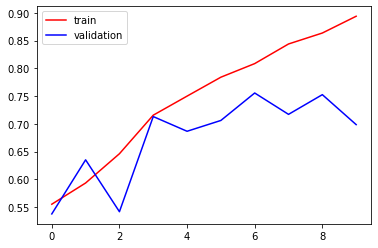

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

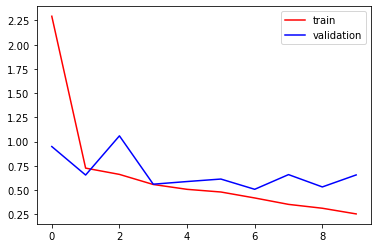

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [69]:
test_image=image.load_img('Documents\CNN Images\single_prediction\cat_or_dog_2.jpg',target_size=(256,256))

In [70]:
test_image=image.img_to_array(test_image, data_format=None, dtype=None)


In [71]:
test_image

array([[[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 247.],
        [245., 245., 247.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 247.],
        [244., 244., 246.]],

       ...,

       [[242., 225., 217.],
        [251., 234., 227.],
        [248., 235., 229.],
        ...,
        [223., 197., 182.],
        [236., 207., 193.],
        [231., 205., 188.]],

       [[247., 234., 226.],
        [244., 231., 225.],
        [248., 233., 228.],
        ...,
        [220., 201., 187.],
        [225., 208., 192.],
        [228., 211., 195.]],

       [[240., 223., 216.],
        [247., 229., 225.],
        [238., 2

In [72]:
test_image=np.expand_dims(test_image,axis=0)


In [73]:
result=model.predict(test_image)

1/1 [==============================] - 0s 39ms/step


In [74]:
result

array([[0.]], dtype=float32)

# 0 = cat
# 1 = dog